# Churn Modelling for Bank Customers

You can download the dataset from kaggle : https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf

In [15]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA (Exploratory Data Analysis)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
df.shape

(10000, 14)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [19]:
# Checking for the Null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [20]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Exited', ylabel='count'>

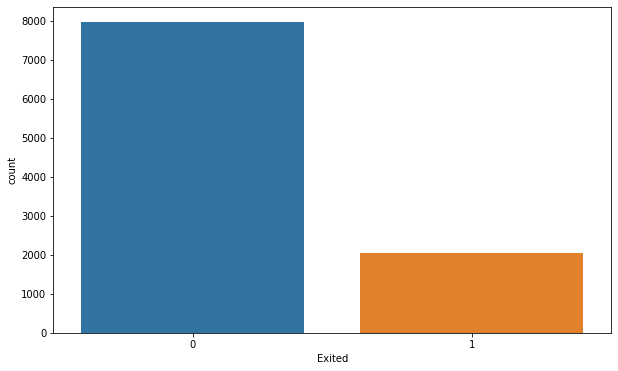

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(df['Exited'])

So We can clearly see that our dataset is imbalanced so we need to fix this imbalance problem otherwise our model will be more biased towards the majority category!

In [22]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
# Removing the unwanted columns like RowNumber , CustomerId, Surname...
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

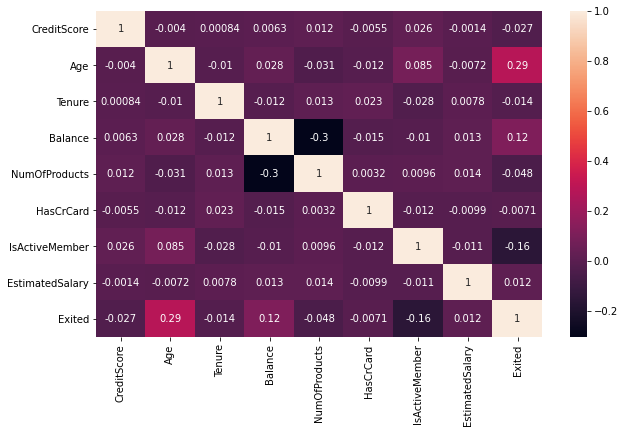

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [24]:
# Dividing into independent and dependent variables
X = df.drop('Exited',axis=1)
y = df['Exited']
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [26]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [27]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [35]:
# We have 2 Categorical features... Geography and Gender...since they are the nominal categorical variables so we will
# do one hot encoding with them

gender = pd.get_dummies(df['Gender'],drop_first=True)
states = pd.get_dummies(df['Geography'],drop_first=True)


In [36]:
type(gender)

pandas.core.frame.DataFrame

In [37]:
# Concatinating with our original data frame df and dropping the categorical columns from previous dataframe
X = pd.concat([X,gender,states],axis=1)
X = X.drop(['Gender','Geography'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [40]:
# Doing the train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
# Importing all the necessary libraries required for building the ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras import models
from tensorflow.keras.models import Sequential

In [52]:
classifier = Sequential() #initializing the ANN
classifier.add(Dense(6,activation='relu',kernel_initializer='he_uniform',input_dim=11))
classifier.add(Dense(6,activation='relu',kernel_initializer='he_uniform'))
classifier.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform'))

# compiling the ANN
classifier.compile(optimizer='Adam',
                  loss='binary_crossentropy',
                   metrics=['accuracy']
                  )

model_history = classifier.fit(X_train,y_train,validation_split=0.20,batch_size=10,epochs=100)


Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 4s 684us/sample - loss: 0.5206 - accuracy: 0.7747 - val_loss: 0.4711 - val_accuracy: 0.7969
Epoch 2/100
6400/6400 [==============================] - 1s 191us/sample - loss: 0.4546 - accuracy: 0.7958 - val_loss: 0.4475 - val_accuracy: 0.7962
Epoch 3/100
6400/6400 [==============================] - 1s 197us/sample - loss: 0.4381 - accuracy: 0.7959 - val_loss: 0.4361 - val_accuracy: 0.8025
Epoch 4/100
6400/6400 [==============================] - 1s 194us/sample - loss: 0.4295 - accuracy: 0.8022 - val_loss: 0.4308 - val_accuracy: 0.8062
Epoch 5/100
6400/6400 [==============================] - 1s 193us/sample - loss: 0.4245 - accuracy: 0.8086 - val_loss: 0.4264 - val_accuracy: 0.8050
Epoch 6/100
6400/6400 [==============================] - 1s 191us/sample - loss: 0.4202 - accuracy: 0.8142 - val_loss: 0.4224 - val_accuracy: 0.8150
Epoch 7/100
6400/6400 [==============================] - 1

6400/6400 [==============================] - 1s 190us/sample - loss: 0.3318 - accuracy: 0.8631 - val_loss: 0.3524 - val_accuracy: 0.8631
Epoch 56/100
6400/6400 [==============================] - 1s 190us/sample - loss: 0.3318 - accuracy: 0.8625 - val_loss: 0.3522 - val_accuracy: 0.8637
Epoch 57/100
6400/6400 [==============================] - 1s 191us/sample - loss: 0.3315 - accuracy: 0.8630 - val_loss: 0.3524 - val_accuracy: 0.8637
Epoch 58/100
6400/6400 [==============================] - 1s 189us/sample - loss: 0.3315 - accuracy: 0.8650 - val_loss: 0.3525 - val_accuracy: 0.8662
Epoch 59/100
6400/6400 [==============================] - 1s 190us/sample - loss: 0.3320 - accuracy: 0.8648 - val_loss: 0.3523 - val_accuracy: 0.8656
Epoch 60/100
6400/6400 [==============================] - 1s 189us/sample - loss: 0.3315 - accuracy: 0.8645 - val_loss: 0.3530 - val_accuracy: 0.8662
Epoch 61/100
6400/6400 [==============================] - 1s 195us/sample - loss: 0.3321 - accuracy: 0.8631 - val

# Visualizing the loss and accuracy

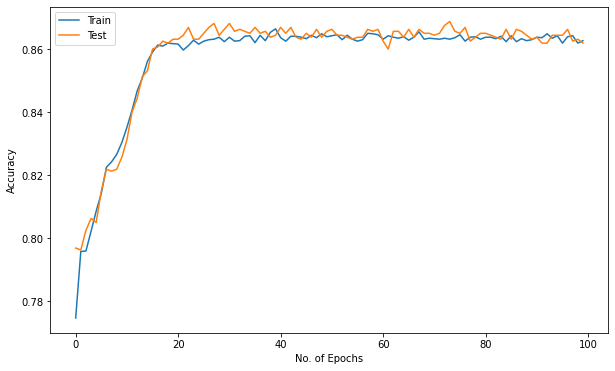

In [60]:
plt.figure(figsize=(10,6))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='best')

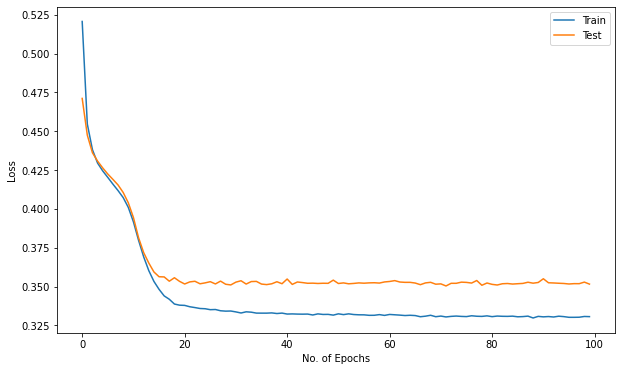

In [61]:
plt.figure(figsize=(10,6))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='best')

#### Important Points to consider :
- Here in this dataset we could try many permutation combinations like adding more layers, or adding a Dropout layers etc.
- We can also fix the imbalance dataset problem by OverSampling methods like...RandomOverSampler or SMOTETomek

# Prediction

In [65]:
# Prediction on the test set
from sklearn.metrics import classification_report,confusion_matrix
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

cm = confusion_matrix(y_test,y_pred)
cm

array([[1523,   72],
       [ 205,  200]], dtype=int64)

<AxesSubplot:>

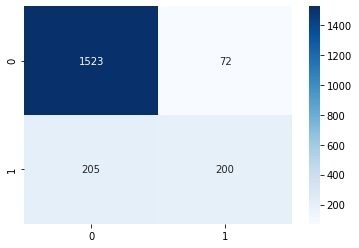

In [67]:
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues')